In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [57]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
boolVerified=[]
for i in range (0,len(dataframe["user_verified"])):
    if dataframe["user_verified"][i]==False:
        boolVerified.append(int(0))
    else:
        boolVerified.append(int(1))
dataframe.insert(8,"boolVerified",boolVerified,True)
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,boolVerified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,0,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,0,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,0,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
dataframe.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [58]:
print(dataframe.groupby('boolVerified').size())

boolVerified
0    65082
1     9354
dtype: int64


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

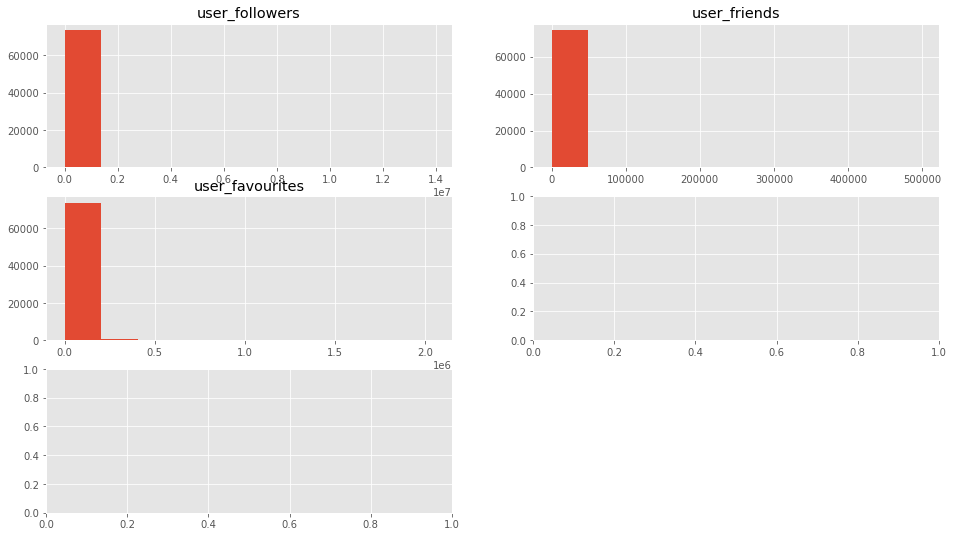

In [63]:
dataframe.drop('boolVerified',1).hist()
plt.show()

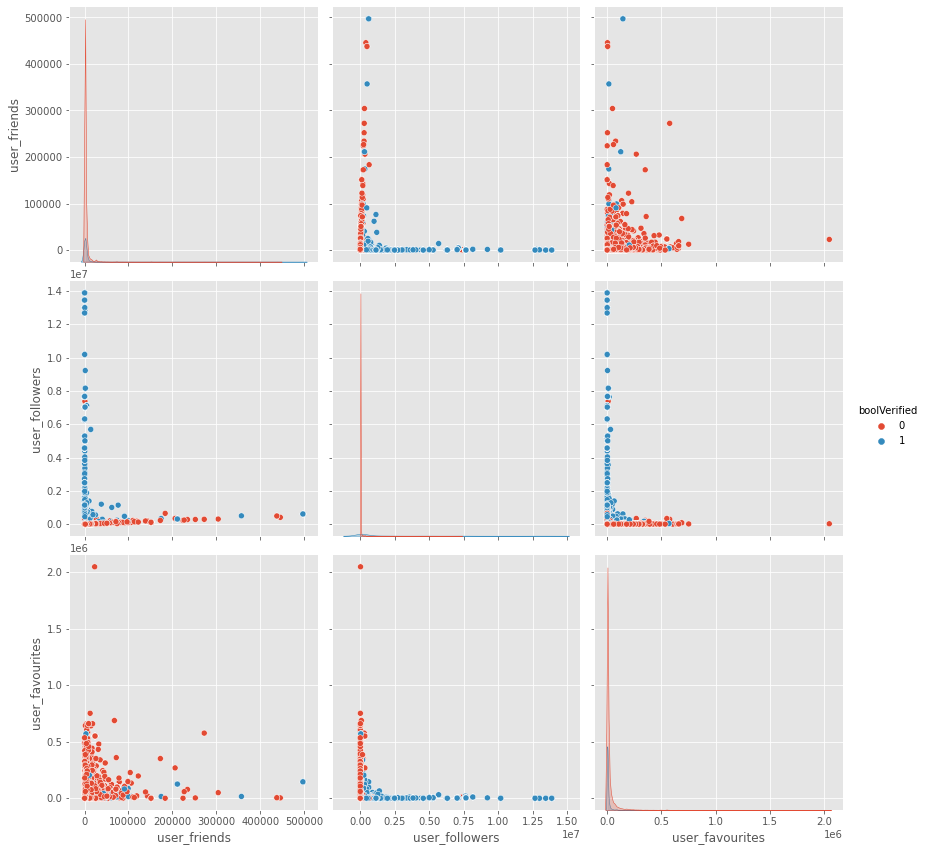

In [59]:
sb.pairplot(dataframe.dropna(), hue='boolVerified',height=4,vars=["user_friends","user_followers","user_favourites"],kind='scatter')

In [60]:
X = np.array(dataframe[["user_friends","user_followers","user_favourites"]])
y = np.array(dataframe['boolVerified'])
X.shape

[0 1 0 ... 0 0 0]


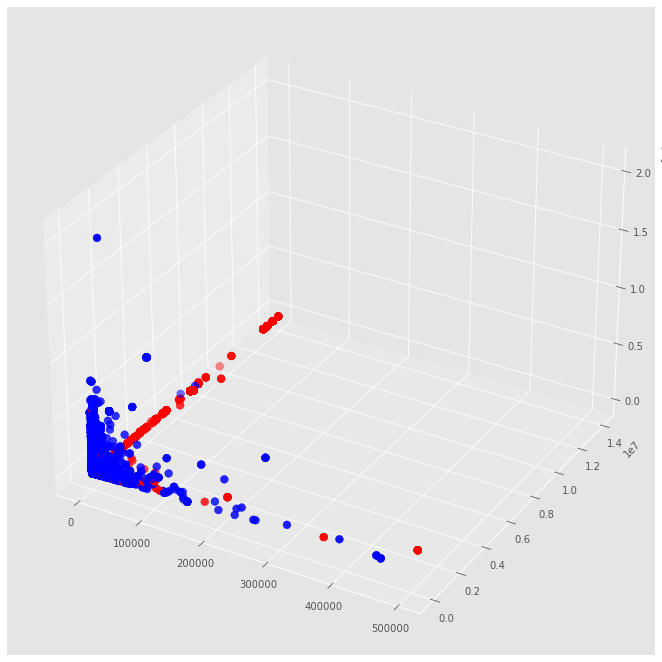

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

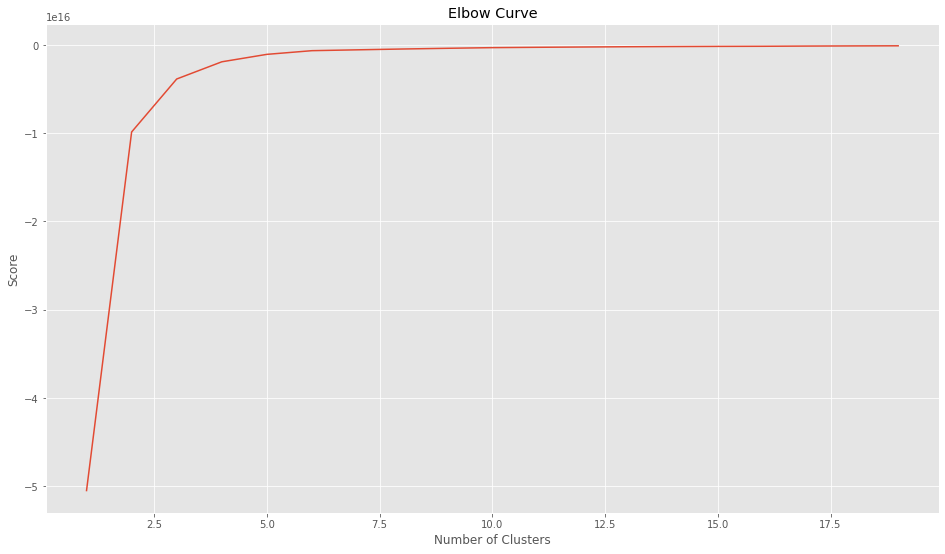

In [64]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.17082296e+03 3.11669314e+04 1.54349135e+04]
 [7.11316832e+02 5.76923429e+06 2.63207921e+03]
 [2.19937888e+02 1.30086912e+07 8.03913043e+01]]


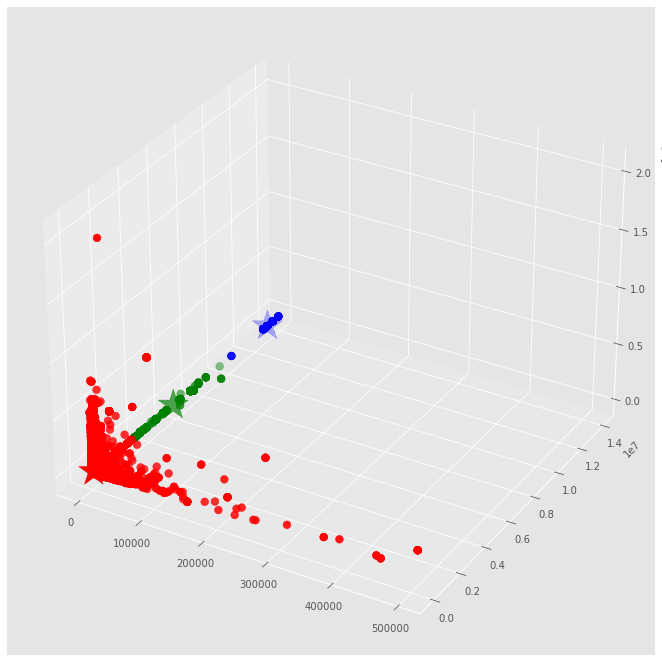

In [84]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

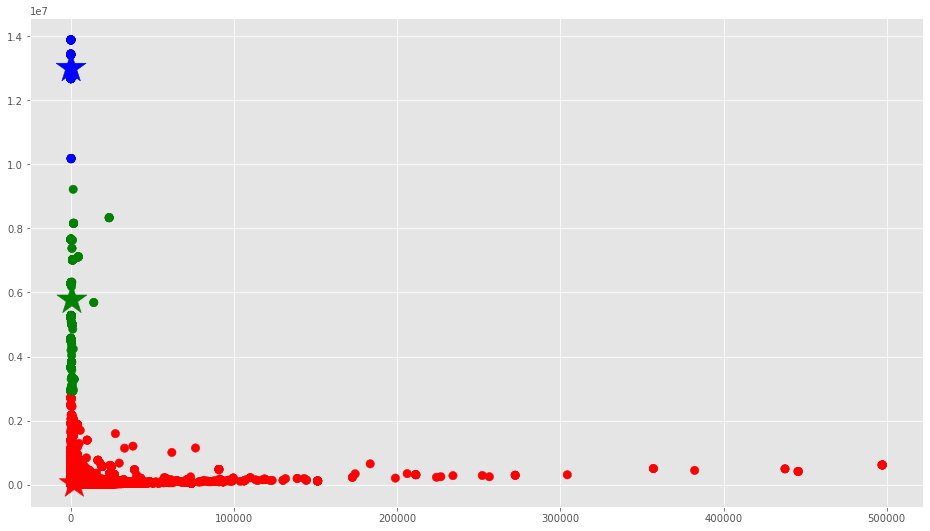

In [85]:
# Getting the values and plotting it
f1 = dataframe['user_friends'].values
f2 = dataframe['user_followers'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

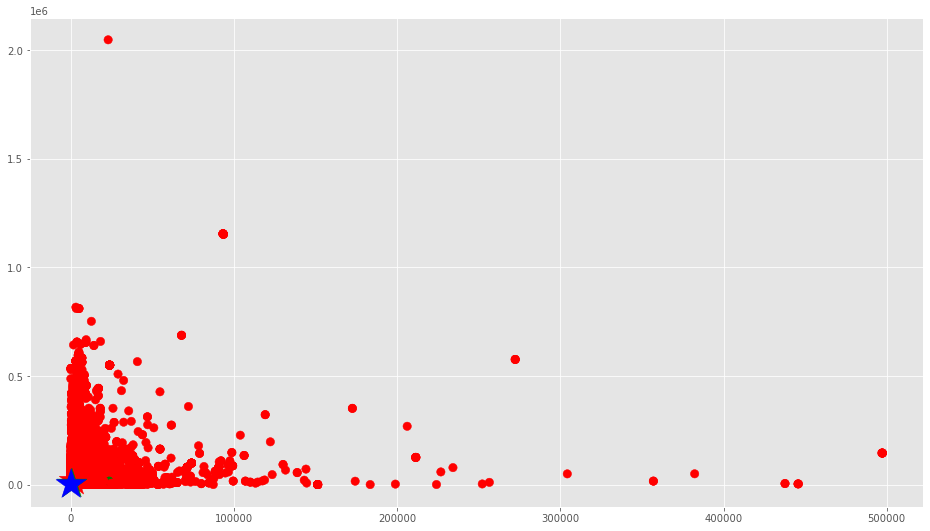

In [86]:
# Getting the values and plotting it
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

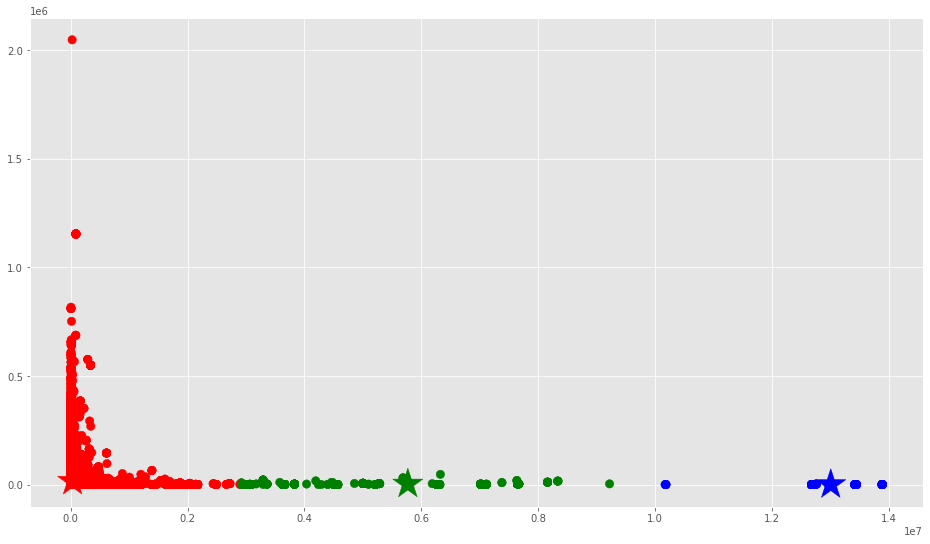

In [87]:
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [88]:
copy =  pd.DataFrame()
copy['user_name']=dataframe['user_name'].values
copy['boolVerified']=dataframe['boolVerified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73670
1,green,605
2,blue,161


In [89]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([14321, 13688, 70675], dtype=int64)

In [92]:
users=dataframe['user_name'].values
for row in closest:
    print(users[row])

🎗Christine Assange
El Universal
The Times Of India


In [94]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['boolVerified']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('boolVerified').size()
diversidadGrupo

,boolVerified,cantidad
0,0,65079
1,1,8591


In [100]:
a=max(dataframe['user_followers'])
print(a)

13892841


In [108]:
user=np.where(dataframe["user_followers"] == a)

In [110]:
dataframe["user_name"][int(user[0])]

'CGTN'